In [8]:
%matplotlib inline
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import math
from sklearn import preprocessing
# Adjusting the size of matplotlib
import matplotlib as mpl
import datetime

df_full = pd.read_csv("AAPL.csv")
df_full.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-07,221.850006,225.369995,220.710007,221.300003,217.918411,37619800
1,2018-09-10,220.949997,221.850006,216.470001,218.330002,214.993759,39516500
2,2018-09-11,218.009995,224.300003,216.559998,223.850006,220.429443,35749000
3,2018-09-12,224.940002,225.000000,219.839996,221.070007,217.691925,49278700
4,2018-09-13,223.520004,228.350006,222.570007,226.410004,222.950317,41706400
5,2018-09-14,225.750000,226.839996,222.520004,223.839996,220.419571,31999300
6,2018-09-17,222.149994,222.949997,217.270004,217.880005,214.550659,37195100
7,2018-09-18,217.789993,221.850006,217.119995,218.240005,214.905167,31571700
8,2018-09-19,218.500000,219.619995,215.300003,218.369995,215.033142,27123800
9,2018-09-20,220.240005,222.279999,219.149994,220.029999,216.667816,26608800


In [16]:
df = df_full.loc[:,['Close','Volume']]
df['HL_PCT'] = (df_full['High'] - df_full['Low']) / df_full['Close'] * 100.0
df['PCT_change'] = (df_full['Close'] - df_full['Open']) / df_full['Open'] * 100.0
df.head()

,Close,Volume,HL_PCT,PCT_change
0,221.300003,37619800,2.105733,-0.247917
1,218.330002,39516500,2.464162,-1.185786
2,223.850006,35749000,3.457675,2.678781
3,221.070007,49278700,2.334104,-1.720457
4,226.410004,41706400,2.552890,1.292949


In [25]:
df = df_full.loc[:,['Close','Volume','Low','High','Open']]
df.head()

,Close,Volume,Low,High,Open
0,221.300003,37619800,220.710007,225.369995,221.850006
1,218.330002,39516500,216.470001,221.850006,220.949997
2,223.850006,35749000,216.559998,224.300003,218.009995
3,221.070007,49278700,219.839996,225.000000,224.940002
4,226.410004,41706400,222.570007,228.350006,223.520004


In [21]:
# df.fillna(value=-99999, inplace=True)
# Print Data rows which are nan
df[df.isnull().any(axis=1)]

,Close,Volume,Low,High,Open


In [26]:
# Separating the label here, we want to predict the AdjClose
forecast_col = 'Close'
df['label'] = df[forecast_col].shift(-1)
df = df.drop(df[df.isnull().any(axis=1)].index)
X = np.array(df.drop(['label'], 1))
df.head()

,Close,Volume,Low,High,Open,label
0,221.300003,37619800,220.710007,225.369995,221.850006,218.330002
1,218.330002,39516500,216.470001,221.850006,220.949997,223.850006
2,223.850006,35749000,216.559998,224.300003,218.009995,221.070007
3,221.070007,49278700,219.839996,225.000000,224.940002,226.410004
4,226.410004,41706400,222.570007,228.350006,223.520004,223.839996


In [28]:
print(X)


[[2.21300003e+02 3.76198000e+07 2.20710007e+02 2.25369995e+02
  2.21850006e+02]
 [2.18330002e+02 3.95165000e+07 2.16470001e+02 2.21850006e+02
  2.20949997e+02]
 [2.23850006e+02 3.57490000e+07 2.16559998e+02 2.24300003e+02
  2.18009995e+02]
 ...
 [2.05699997e+02 2.00230000e+07 2.04220001e+02 2.06979996e+02
  2.06429993e+02]
 [2.09190002e+02 1.91881000e+07 2.07320007e+02 2.09479996e+02
  2.08389999e+02]
 [2.13279999e+02 2.39137000e+07 2.11509995e+02 2.13970001e+02
  2.12000000e+02]]


In [49]:
# We want to separate 10 percent of the data to forecast
forecast_out = int(math.ceil(0.3 * len(df)))

In [31]:
# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)
print(X)

[[ 1.38777282  0.35698899  1.46112696  1.46979214  1.41162385]
 [ 1.24638172  0.49345344  1.25862756  1.30389421  1.368885  ]
 [ 1.50916932  0.22238801  1.26292575  1.41936316  1.22927272]
 ...
 [ 0.64511247 -0.90907179  0.67357706  0.60306705  0.67937156]
 [ 0.81125909 -0.96914147  0.82163094  0.72089266  0.77244664]
 [ 1.00596919 -0.62914233  1.02174152  0.93250768  0.94387525]]


In [50]:
# Split the data into trainings data and test data
X_test = X[-forecast_out:]
X_train = X[:-forecast_out]

In [51]:
# Separate label and identify it as y
y = np.array(df['label'])
y_train = y[:-forecast_out]
y_test = y[-forecast_out:]

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [54]:
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [55]:
# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [56]:
# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [57]:
clfridge = Ridge(alpha=.5)
clfridge.fit(X_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [58]:
clfridge = Ridge(alpha=.5)
clfridge.fit(X_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [59]:
clflasso = Lasso(alpha=0.1)
clflasso.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [60]:
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [61]:
df[-forecast_out:]

,Close,Volume,Low,High,Open,label
175,186.600006,28364800,184.699997,188.000000,185.220001,182.779999
176,182.779999,29748600,182.550003,185.710007,184.660004,179.660004
177,179.660004,36529700,177.809998,180.539993,179.800003,178.970001
178,178.970001,23714700,178.619995,182.139999,180.199997,178.229996
179,178.229996,27948200,177.910004,180.589996,178.919998,177.380005
180,177.380005,28481200,176.000000,179.350006,176.419998,178.300003
181,178.300003,21218400,176.669998,179.229996,177.949997,175.070007
182,175.070007,27043600,174.990005,177.990005,176.229996,173.300003
183,173.300003,40396100,170.270004,177.919998,175.600006,179.639999
184,179.639999,30968000,174.520004,179.830002,175.440002,182.539993


In [63]:
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceridge = clfridge.score(X_test,y_test)
confidencelasso = clflasso.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)
# results
print('The linear regression confidence is ', confidencereg)
print('The quadratic regression 2 confidence is ', confidencepoly2)
print('The quadratic regression 3 confidence is ', confidencepoly3)
print('The Ridge regression confidence is ', confidenceridge)
print('The Lasso confidence is ', confidencelasso)
print('The knn regression confidence is ', confidenceknn)

The linear regression confidence is  0.8897366510000123
The quadratic regression 2 confidence is  0.8931198136337222
The quadratic regression 3 confidence is  0.8825606902383119
The Ridge regression confidence is  0.8902864287213947
The Lasso confidence is  0.8891992432310504
The knn regression confidence is  0.8188516378239594


In [64]:
# select the classifier to predict
forecast_set = clfpoly3.predict(X_test)

df['Forecast'] = np.nan
index = len(df)- forecast_out
for i in forecast_set:
    df['Forecast'].at[index] = i
    index += 1

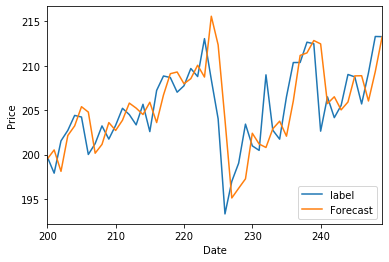

In [65]:
df['label'].tail(50).plot()
df['Forecast'].tail(50).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()